# View the tables we will use

In this notebook, I will review the tables that I created with the notebooks:

- [books_10k_exploration.ipynb](books_10k_exploration.ipynb)
- [fix_the_other_tables.ipynb](fix_the_other_tables.ipynb)

In [1]:
import pandas as pd
from pathlib import Path
data_folder = Path.cwd().parent / 'data'
transformed_folder = data_folder / 'transformed'

books = pd.read_csv( Path(transformed_folder,'books_final.csv') )
book_genres=pd.read_csv(Path(transformed_folder,'books_genres.csv') )
genres=pd.read_csv(Path(transformed_folder,'genres.csv') )
to_read=pd.read_csv(Path(transformed_folder,'to_read_filtered.csv'))
users=pd.read_csv(Path(transformed_folder,'users.csv') )
ratings=pd.read_csv(Path(transformed_folder,'ratings_filtered_some_set_to_0.csv') )

### Books

This table contains the books from the kaggle dataset enriched with scraped goodreads data. The genres and author columns are transformed from strings to lists

In [2]:
books.head()

book_id                                                url  \
0        1  https://www.goodreads.com/book/show/2767052-th...   
1        3  https://www.goodreads.com/book/show/41865.Twil...   
2        8  https://www.goodreads.com/book/show/5107.The_C...   
3        9  https://www.goodreads.com/book/show/960.Angels...   
4       12  https://www.goodreads.com/book/show/13335037-d...   

                    title        isbn  \
0        The Hunger Games  0439023483   
1                Twilight  0316015849   
2  The Catcher in the Rye  0316769177   
3         Angels & Demons  1416524797   
4               Divergent  0062024035   

                                         description  \
0  Could you survive on your own in the wild, wit...   
1  About three things I was absolutely positive.F...   
2  It's Christmas time and Holden Caulfield has j...   
3  World-renowned Harvard symbologist Robert Lang...   
4  In Beatrice Prior's dystopian Chicago world, s...   

                                            imageUrl  \
0  https://images-na.ssl-images-amazon.com/images...   
1  https://images-na.ssl-images-amazon.com/images...   
2  https://images-na.ssl-images-amazon.com/images...   
3  https://images-na.ssl-images-amazon.com/images...   
4  https://images-na.ssl-images-amazon.com/images...   

                                              genres  \
0  ['Dystopia', 'Romance', 'Young Adult', 'Audiob...   
1  ['Romance', 'Supernatural', 'Paranormal Romanc...   
2  ['American', 'Coming Of Age', 'Read For School...   
3  ['Thriller', 'Mystery', 'Mystery Thriller', 'N...   
4  ['Dystopia', 'Romance', 'Young Adult', 'Fictio...   

                   publisher               author publishDate  \
0           Scholastic Press  ['Suzanne Collins']  2008-10-14   
1  Little, Brown and Company  ['Stephenie Meyer']  2006-09-06   
2             Back Bay Books    ['J.D. Salinger']  2001-01-30   
3               Pocket Books        ['Dan Brown']  2006-04-01   
4      Katherine Tegen Books    ['Veronica Roth']  2012-01-01   

   goodreads_book_id language  \
0            2767052  English   
1              41865  English   
2               5107  English   
3                960  English   
4           13335037  English   

                                         genres_list          author_list  
0  ['Dystopia', 'Romance', 'Young Adult', 'Audiob...  ['Suzanne Collins']  
1  ['Romance', 'Supernatural', 'Paranormal Romanc...  ['Stephenie Meyer']  
2  ['American', 'Coming Of Age', 'Read For School...    ['J.D. Salinger']  
3  ['Thriller', 'Mystery', 'Mystery Thriller', 'N...        ['Dan Brown']  
4  ['Dystopia', 'Romance', 'Young Adult', 'Fictio...    ['Veronica Roth']

In [3]:
books.loc[books['title'] == "A Song of Ice and Fire"]

book_id                                                url  \
1583     2149  https://www.goodreads.com/book/show/9814682-a-...   
1836     2527  https://www.goodreads.com/book/show/12177850-a...   

                       title        isbn  \
1583  A Song of Ice and Fire  0345529057   
1836  A Song of Ice and Fire  1780484259   

                                            description  \
1583  George R. R. Martin's A Song of Ice and Fire s...   
1836  For the first time, all five novels in the epi...   

                                               imageUrl  \
1583  https://images-na.ssl-images-amazon.com/images...   
1836  https://images-na.ssl-images-amazon.com/images...   

                                                 genres publisher  \
1583  ['High Fantasy', 'Dragons', 'Epic', 'Epic Fant...    Bantam   
1836  ['High Fantasy', 'Dragons', 'Epic Fantasy', 'N...    Zatpix   

                      author publishDate  goodreads_book_id language  \
1583  ['George R.R. Martin']  2011-03-22            9814682  English   
1836  ['George R.R. Martin']  2011-07-22           12177850  English   

                                            genres_list  \
1583  ['High Fantasy', 'Dragons', 'Epic', 'Epic Fant...   
1836  ['High Fantasy', 'Dragons', 'Epic Fantasy', 'N...   

                 author_list  
1583  ['George R.R. Martin']  
1836  ['George R.R. Martin']

### Genres

This table contains the genres of each book. The genres are taken from the Goodreads website.

In [4]:
genres.head()

genre_id        genre
0         1     Dystopia
1         2      Romance
2         3  Young Adult
3         4    Audiobook
4         5      Fiction

### Book-genres assotiations

This table contains the joining of books to genres. It is done with book_id and genre_id

In [7]:
book_genres.head()

book_id  genre_id
0        1         1
1        1         2
2        1         3
3        1         4
4        1         5

### Users

The original kaggle dataset didn't have a users table. So I created one using the users_id in the ratings tables and I assigned it names and sex

In [8]:
users.head()

user_id        username     sex
0        1          Lee4an    male
1        2  Partypooper009  female
2        3       Jenna1021  female
3        4      ALMEHZA_02    male
4        5     Fakehashish  female

### To read

Books from the to_read.csv table in the Kaggle dataset, filtered


In [9]:
to_read.head()

username        isbn
0  theblacktaco  0316769177
1    knattymama  0316769177
2  flamingdart1  0316769177
3  alfabet_soup  0316769177
4      ahmed44f  0316769177

In [10]:
len(to_read)

569422

### Ratings

Ratings from the users to the books

In [11]:
ratings.head()

username        isbn  rating
0              Lee4an  1400097029       3
1      eriktheredhead  1400097029       4
2  Shoulditeachphysed  1400097029       4
3  thoughtswillwonder  1400097029       4
4            nigports  1400097029       5

In [12]:
len(ratings)

3752035

<Axes: >

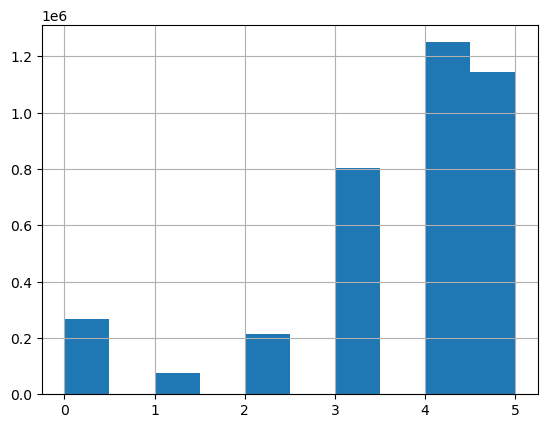

In [13]:
ratings.rating.hist()